# GENERAL NOTES

https://www.youtube.com/watch?v=ZBCLIvznxnI&ab_channel=MachineLearningMindset

TODO: 
- check their correcting encoding to utf-8


other ressources:
- https://colab.research.google.com/github/janlukasschroeder/nlp-cheat-sheet-python/blob/master/NLP-Cheat-Sheet.ipynb
- 

what to compare: (always one to one comparison)
- when compare sub categories to cv: what is the complete voc? is it  jobadsALL+cv or jobadHR+cv
- carefull to do fit&transform on train data and only transform on test data: (cause used fit_transform()) :
https://stackoverflow.com/questions/47778403/computing-tf-idf-on-the-whole-dataset-or-only-on-training-data



good experiences:
- check how model does on: cv with words known from job vs cv with a lot of "new words"(words not in jobads)

new problems:
- how do i define the vocabulary for BERT model if resumes can have new words? real life example is trained on big dataset and thenuse cv to better learn?

# Data Analysis 

## job categories analysis

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval

df_job = pd.read_csv("jobads_dataset.csv",index_col='Unnamed: 0',converters={'job_category': eval}) 
categories_list = pd.read_csv("categories_list.csv",index_col='Unnamed: 0',converters={'category': literal_eval}) 

categories_list.info()
categories_list

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  40 non-null     object
dtypes: object(1)
memory usage: 640.0+ bytes


,category
0,"[Accounting, Auditing, Taxation]"
1,"[Admin, Secretarial]"
2,"[Advertising, Media]"
3,"[Architecture, Interior Design]"
4,[Banking and Finance]
5,[Building and Construction]
6,[Consulting]
7,[Customer Service]
8,[Design]
9,[Education and Training]


In [51]:
df_job.info()
df_job.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20298 entries, 0 to 20297
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text             20298 non-null  object
 1   skills_required  20298 non-null  object
 2   job_category     20298 non-null  object
dtypes: object(3)
memory usage: 634.3+ KB


,text,skills_required,job_category
0,providing support director admin manager assis...,"['Access', 'Customer Service', 'Data Entry', '...",[1]
1,company overview google conventional company i...,"['Adobe Creative Suite', 'Advertising', 'Art D...",[8]
2,manager manager job involves vast array duties...,"['Active Directory', 'Business Analysis', 'Cha...",[19]
3,undertaking various active directory projects ...,"['Analysis', 'Business Analysis', 'Business De...",[19]
4,provide l2 support sap hcm related issues trou...,"['Analysis', 'Business Analysis', 'Business De...",[19]


categories_list:                               category
0     [Accounting, Auditing, Taxation]
1                 [Admin, Secretarial]
2                 [Advertising, Media]
3      [Architecture, Interior Design]
4                [Banking and Finance]
5          [Building and Construction]
6                         [Consulting]
7                   [Customer Service]
8                             [Design]
9             [Education and Training]
10                       [Engineering]
11                     [Entertainment]
12               [Environment, Health]
13                [Events, Promotions]
14                [General Management]
15                      [General Work]
16        [Healthcare, Pharmaceutical]
17                       [Hospitality]
18                   [Human Resources]
19            [Information Technology]
20                         [Insurance]
21                             [Legal]
22           [Logistics, Supply Chain]
23                     [Manufacturing]
24      

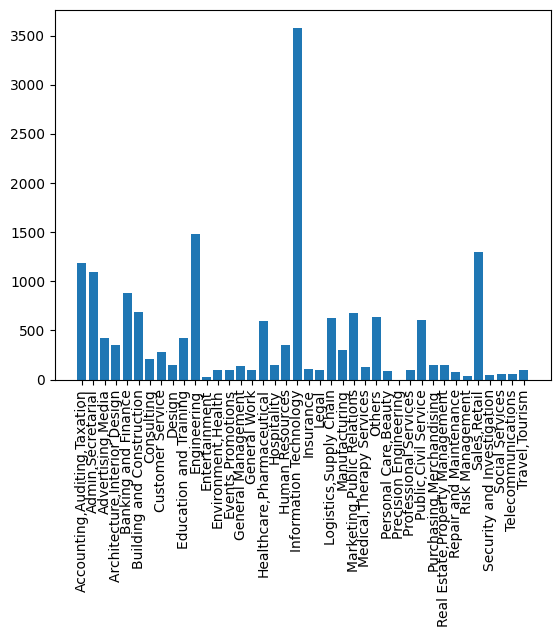

In [52]:
category_counts = [0 for i in range(len(categories_list))]

def count_categories(entry):
    for ind in entry['job_category']:
        category_counts[ind] += 1
    return -1

df_job.apply(count_categories,axis=1)

cat_list_string = [','.join(ele) for ele in categories_list['category'].values.tolist()]
print("categories_list:",categories_list)
print("cat_list_string:",cat_list_string)
print("category_counts:",category_counts)

plot = plt.bar(cat_list_string, category_counts)
plt.xticks(rotation='vertical')
plt.show()

category_counts: [1187, 1095, 418, 354, 882, 691, 204, 282, 149, 421, 1481, 25, 100, 101, 140, 97, 593, 144, 355, 3583, 110, 92, 623, 297, 677, 131, 638, 91, 0, 102, 608, 151, 145, 73, 32, 1299, 48, 54, 58, 99] <class 'list'>
cat_list_string: ['Accounting,Auditing,Taxation', 'Admin,Secretarial', 'Advertising,Media', 'Architecture,Interior Design', 'Banking and Finance', 'Building and Construction', 'Consulting', 'Customer Service', 'Design', 'Education and Training', 'Engineering', 'Entertainment', 'Environment,Health', 'Events,Promotions', 'General Management', 'General Work', 'Healthcare,Pharmaceutical', 'Hospitality', 'Human Resources', 'Information Technology', 'Insurance', 'Legal', 'Logistics,Supply Chain', 'Manufacturing', 'Marketing,Public Relations', 'Medical,Therapy Services', 'Others', 'Personal Care,Beauty', 'Precision Engineering', 'Professional Services', 'Public,Civil Service', 'Purchasing,Merchandising', 'Real Estate,Property Management', 'Repair and Maintenance', 'Risk 

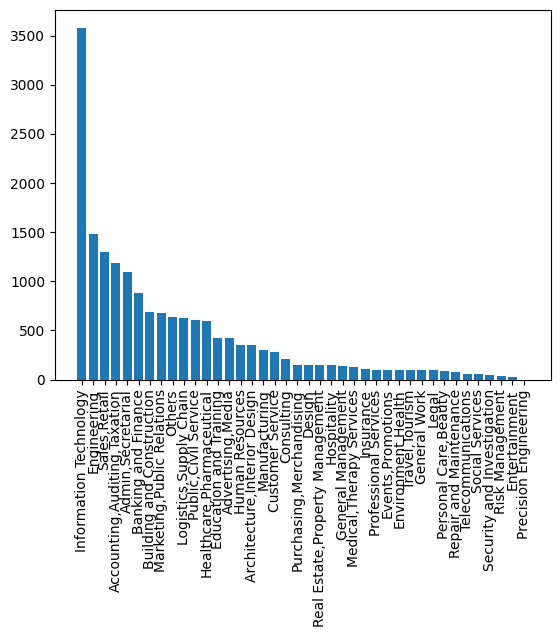

In [53]:
print("category_counts:",category_counts,type(category_counts))
print("cat_list_string:",cat_list_string,type(cat_list_string))


k_top = len(categories_list)
ord_indexes = np.argsort(category_counts)[::-1][:k_top]
print("ord_indexes:",ord_indexes,type(ord_indexes))
ord_category_counts = np.array(category_counts)[ord_indexes]
ord_cat_list_string = np.array(cat_list_string)[ord_indexes]

print("ORDERED:")
print("ord_category_counts:",ord_category_counts)
print("ord_cat_list_string:",ord_cat_list_string)

plot = plt.bar(ord_cat_list_string, ord_category_counts)
plt.xticks(rotation='vertical')
plt.show()

In [62]:
#Where to cut in the categories ?
print("ORDERED:")
print("ord_category_counts:",ord_category_counts)
#print("ord_cat_list_string:",ord_cat_list_string)

def index_first_smaller(list,threshold):
    for i in range(len(list)):
        if list[i] < threshold:
            return i
    return -1

#at least 500 cv's per category ???
k_top = index_first_smaller(ord_category_counts,500)
print("\nmin 500:",k_top,"categories:",ord_cat_list_string[:k_top])
print("total number of jobads:",sum(ord_category_counts[:k_top]))
#at least 200 cv's per category ???
k_top = index_first_smaller(ord_category_counts,200)
print("\nmin 200:",k_top,"categories:",ord_cat_list_string[:k_top])
print("total number of jobads:",sum(ord_category_counts[:k_top]))
#at least 100 cv's per category ???
k_top = index_first_smaller(ord_category_counts,100)
print("\nmin 100:",k_top,"categories:",ord_cat_list_string[:k_top])
print("total number of jobads:",sum(ord_category_counts[:k_top]))

ORDERED:
ord_category_counts: [3583 1481 1299 1187 1095  882  691  677  638  623  608  593  421  418
  355  354  297  282  204  151  149  145  144  140  131  110  102  101
  100   99   97   92   91   73   58   54   48   32   25    0]

min 500: 12 categories: ['Information Technology' 'Engineering' 'Sales,Retail'
 'Accounting,Auditing,Taxation' 'Admin,Secretarial' 'Banking and Finance'
 'Building and Construction' 'Marketing,Public Relations' 'Others'
 'Logistics,Supply Chain' 'Public,Civil Service'
 'Healthcare,Pharmaceutical']
total number of jobads: 13357

min 200: 19 categories: ['Information Technology' 'Engineering' 'Sales,Retail'
 'Accounting,Auditing,Taxation' 'Admin,Secretarial' 'Banking and Finance'
 'Building and Construction' 'Marketing,Public Relations' 'Others'
 'Logistics,Supply Chain' 'Public,Civil Service'
 'Healthcare,Pharmaceutical' 'Education and Training' 'Advertising,Media'
 'Human Resources' 'Architecture,Interior Design' 'Manufacturing'
 'Customer Service' 'Consu

HOW TO SEPARATE JOBADS IN CATEGORIES DATASETS

We can:
- take just the k-top categories: 
    - enough jobads?
    - ?
- take k-top categories and cluster all jobads to a certain category: 
    - clustering on jobads: what distance/vector to use for clustering?
    - clustering on categories: link no k-top categories to a k-top category



# Similarity measurements 

#install all deppendencies
%pip install --upgrade pip
%pip install --upgrade protobuf
%pip install tensorflow
%pip install tensorflow-text

In [54]:
import re
from collections import Counter
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_text as tf_txt #pip install tensorflow-text

ImportError: cannot import name 'builder' from 'google.protobuf.internal' (c:\Users\Andru\OneDrive\Master Thesis\BERT-XMLC-Skill-Extraction\venv_310_64bit\lib\site-packages\google\protobuf\internal\__init__.py)

In [ ]:
text_init = "D_df dsdds"

text_plain = text_init.encode('UTF-16')
utf_text = tf.strings.unicode_transcode(text_plain, input_encoding='UTF-16', output_encoding='UTF-8')

print("utf_text:",utf_text)
utf_text_byte = utf_text.numpy()
returned_text_str = utf_text_byte.decode('UTF-8')
print("returned_text_str:",returned_text_str)


NameError: name 'tf' is not defined

## Shared vocabulary

- create universal vocabulary (union of individual vocs)
- create a shared vocabulary vector for each datatset:
   - for each word of universal vocabulary 1 if present 0 if not
- angular distance to measure the similarity

In [ ]:
# https://colab.research.google.com/github/practical-nlp/practical-nlp/blob/master/Ch3/02_Bag_of_Words.ipynb?authuser=1#scrollTo=bMoADcrhJP2H

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

dataset = pd.read_csv("jobads_dataset.csv")
documents = dataset.text.values

#processed_docs = [doc.lower().replace(".","") for doc in documents]

processed_docs = documents


#look at the documents list
print("Our corpus: ", processed_docs[0:5])

count_vect = CountVectorizer()
#Build a BOW representation for the corpus
bow_rep = count_vect.fit_transform(processed_docs)

#Look at the vocabulary mapping
print("Our vocabulary: ", count_vect.vocabulary_)

#see the BOW rep for first 2 documents
print("BoW representation for 'dog bites man': ", bow_rep[0].toarray())
print("BoW representation for 'man bites dog: ",bow_rep[1].toarray())

#Get the representation using this vocabulary, for a new text
temp = count_vect.transform(["dog and dog are friends"])
print("Bow representation for 'dog and dog are friends':", temp.toarray())

Our corpus:  ['providing support director admin manager assisting daily day day activities carry indoor sales network tele marketing exp willing learn also generate quotation invoicing etc sales coordination functions requirements preferably least 1 year relevant exp'
 "company overview google conventional company intend become one true share attributes world successful organizations focus innovation smart business practices comes mind even continue grow committed retaining small company feel google know every employee something important say every employee integral success provide individually tailored compensation packages comprised competitive salary bonus equity components along opportunity earn financial bonuses rewards googlers thrive small focused teams high energy environments believe ability technology change world passionate lives work information visit www google com careers area ux user experience forefront create intuitive innovative beautiful products people love strive l

In [ ]:
# https://colab.research.google.com/github/practical-nlp/practical-nlp/blob/master/Ch3/02_Bag_of_Words.ipynb?authuser=1#scrollTo=bMoADcrhJP2H

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# no stemming and lemmatization done in jobads dataset
# example: "write, written, writing, writers" are present in dataset

#TODO: in resumes remove rare words

#------------load all
dataset_jobs = pd.read_csv("jobads_dataset_TEST.csv")
texts_jobs = dataset_jobs.text.values.tolist()
dataset_cv = pd.read_csv("resumes_dataset_TEST.csv")
texts_cv = dataset_cv.text.values.tolist()

print("texts_jobs:",type(texts_jobs),texts_jobs)
print("texts_cv:",type(texts_cv),texts_cv)

all_texts = texts_jobs + texts_cv

texts_jobs: <class 'list'> ['providing support director admin manager assisting daily day day activities carry indoor sales network tele marketing exp willing learn also generate quotation invoicing etc sales coordination functions requirements preferably least 1 year relevant exp', "company overview google conventional company intend become one true share attributes world successful organizations focus innovation smart business practices comes mind even continue grow committed retaining small company feel google know every employee something important say every employee integral success provide individually tailored compensation packages comprised competitive salary bonus equity components along opportunity earn financial bonuses rewards googlers thrive small focused teams high energy environments believe ability technology change world passionate lives work information visit www google com careers area ux user experience forefront create intuitive innovative beautiful products people

In [ ]:
#----------------create universal vocabulary (union of individual vocs) & compare size to seperate vocs

def extract_voc(texts):
    count_vect_binary = CountVectorizer(binary=True) #only interested if the word is at least once in the dataset
    bow_rep = count_vect_binary.fit_transform(texts)
    voc = set(count_vect_binary.vocabulary_)

    print("VOCABULARY:")
    print("Our vocabulary: ", count_vect_binary.vocabulary_)
    print("voc of size:",len(voc))

    return voc, count_vect_binary

#Build a BOW representation for each dataset n union
universal_voc,count_vect = extract_voc(all_texts)
jobs_voc,_ = extract_voc(texts_jobs)
cv_voc,_ = extract_voc(texts_cv)

print("universal_voc of size ",len(universal_voc),":",universal_voc)
print("jobs_voc of size ",len(jobs_voc),":",jobs_voc)
print("cv_voc of size ",len(cv_voc),":",cv_voc)



VOCABULARY:
Our vocabulary:  {'providing': 1034, 'support': 1267, 'director': 424, 'admin': 69, 'manager': 789, 'assisting': 143, 'daily': 360, 'day': 367, 'activities': 59, 'carry': 223, 'indoor': 660, 'sales': 1154, 'network': 868, 'tele': 1294, 'marketing': 798, 'exp': 506, 'willing': 1432, 'learn': 741, 'also': 89, 'generate': 578, 'quotation': 1052, 'invoicing': 697, 'etc': 490, 'coordination': 335, 'functions': 573, 'requirements': 1099, 'preferably': 987, 'least': 742, 'year': 1449, 'relevant': 1084, 'company': 281, 'overview': 927, 'google': 582, 'conventional': 329, 'intend': 684, 'become': 180, 'one': 898, 'true': 1343, 'share': 1189, 'attributes': 148, 'world': 1443, 'successful': 1259, 'organizations': 916, 'focus': 555, 'innovation': 670, 'smart': 1204, 'business': 208, 'practices': 985, 'comes': 270, 'mind': 823, 'even': 494, 'continue': 320, 'grow': 593, 'committed': 274, 'retaining': 1127, 'small': 1203, 'feel': 537, 'know': 722, 'every': 497, 'employee': 456, 'somethin

In [ ]:
#-----------------create a shared vocabulary vector for each datatset (for each word of universal vocabulary 1 if present 0 if not)
#Get the representation using this vocabulary, for a new text

#EXAMPLE
temp = count_vect.transform(["dog and dog are friends"])
print("Bow representation for 'dog and dog are friends':", temp.toarray())



import numpy as np

def get_shared_vocabulary_vector(texts,count_vect_binary):
    voc_presence = count_vect_binary.transform(texts)
    vector = np.array(voc_presence.toarray())
    total = np.sum(vector, axis=0)
    binary = total.astype(bool).astype(int)
    return binary



job_shared_vocabulary_vector = get_shared_vocabulary_vector(texts_jobs,count_vect)
print("get_shared_vocabulary_vector(texts_job) with total ",sum(job_shared_vocabulary_vector),":",job_shared_vocabulary_vector)

cv_shared_vocabulary_vector = get_shared_vocabulary_vector(texts_cv,count_vect)
print("get_shared_vocabulary_vector(texts_cv) with total ",sum(cv_shared_vocabulary_vector),":",cv_shared_vocabulary_vector)




Bow representation for 'dog and dog are friends': [[0 0 0 ... 0 0 0]]
get_shared_vocabulary_vector(texts_job) with total  719 : [0 1 0 ... 1 0 0]
get_shared_vocabulary_vector(texts_cv) with total  970 : [1 0 1 ... 1 1 1]


In [ ]:
#-----------------angular difference between shared voc vectors
# FROM PAPER (domain similarities):
# The angular distance between two of these individual dataset vectors should signify their similarity.
# This should give an indication of whether similar language is used between the datasets.

# https://en.wikipedia.org/wiki/Angular_distance

# https://stackoverflow.com/questions/2827393/angles-between-two-n-dimensional-vectors-in-python/13849249#13849249

def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))


# https://math.stackexchange.com/questions/2874940/cosine-similarity-vs-angular-distance
# sim(u.v) = (1 - arccos(cosine_similarity(u, v)) / pi)
#   with:
# cosine_similarity(u, v) = (u . v) / (||u|| . ||v||)

#TODO unedrstand diff between these 2 formulas: 
#      I think: BUT REALLY NOT SURE
#           - 1st is angle between the two vectors:
#               this does not take into account the magnitudes (angular_dist(u,v)=angular_dist(||u||,||v||)
#           - 2nd is cos of angle between the two
#               this takes into account the magnitudes (cos(u,v)=/=cos(||u||,||v||)


angle_between_job_cv = angle_between(job_shared_vocabulary_vector,cv_shared_vocabulary_vector)
print("angle_between_job_cv:",angle_between_job_cv)

size_universal_voc = len(universal_voc)
vector_universal_voc = np.ones(size_universal_voc)
angle_between_universal_job = angle_between(job_shared_vocabulary_vector,vector_universal_voc)
print("angle_between_universal_job:",angle_between_universal_job)
angle_between_universal_cv = angle_between(cv_shared_vocabulary_vector,vector_universal_voc)
print("angle_between_universal_cv:",angle_between_universal_cv)


angle_between_job_cv: 1.2842999106252504
angle_between_universal_job: 0.7905599894290355
angle_between_universal_cv: 0.6145060669325315


## TD-IDF

In [ ]:
# https://colab.research.google.com/github/janlukasschroeder/nlp-cheat-sheet-python/blob/master/NLP-Cheat-Sheet.ipynb#scrollTo=_s-zKz_z2miy

# t F -idf (term frequency-inverse document frequency) is a statistical measure that evaluates how relevant a word is to a document 
#in a collection of documents. 
from sklearn.feature_extraction.text import TfidfVectorizer

document_corpus = [
  "Dog bites man", 
  "Man bites dog", 
  "Dog eats meat", 
  "Man eats food"
]

tfidf = TfidfVectorizer()
bow_rep_tfidf = tfidf.fit_transform(document_corpus)

print("IDF for all words in the vocabulary")
print(tfidf.idf_)
print("\nAll words in the vocabulary.")
print(tfidf.get_feature_names_out())

temp = tfidf.transform(["Dog bites man"])

print("\nTF-IDF representation for 'Dog bites man':\n", temp.toarray())

IDF for all words in the vocabulary
[1.51082562 1.22314355 1.51082562 1.91629073 1.22314355 1.91629073]

All words in the vocabulary.
['bites' 'dog' 'eats' 'food' 'man' 'meat']

TF-IDF representation for 'Dog bites man':
 [[0.65782931 0.53256952 0.         0.         0.53256952 0.        ]]


In [ ]:
# https://colab.research.google.com/github/janlukasschroeder/nlp-cheat-sheet-python/blob/master/NLP-Cheat-Sheet.ipynb#scrollTo=_s-zKz_z2miy

from sklearn.feature_extraction.text import TfidfVectorizer



def counter_voc(all_texts):
    count_vect = CountVectorizer() #only interested if the word is at least once in the dataset
    bow_rep = count_vect.fit(all_texts)
    voc = set(count_vect.vocabulary_)

    print("VOCABULARY:")
    print("Our vocabulary: ", count_vect.vocabulary_)
    print("voc of size:",len(voc))

    return count_vect, count_vect.vocabulary_

def get_counter_voc_vector(texts,count_vect):
    voc_vector = np.zeros(len(count_vect.vocabulary_))
    for text in texts:
        bow_rep = count_vect.transform([text])
        voc_vector = voc_vector + bow_rep.toarray()[0]
    return voc_vector


# frequency count
count_vect,_ = counter_voc(all_texts)
print("count_vect.vocabulary_:",count_vect.vocabulary_)

jobs_voc_count = get_counter_voc_vector(texts_jobs,count_vect)
print("jobs_voc_count:",jobs_voc_count)

# Inverse document frequency: is calculated by taking the logarithm of the amount 
# of total datasets divided by the amount of datasets in which the current word occurs






tfidf = TfidfVectorizer()
bow_rep_tfidf = tfidf.fit_transform(all_texts)

print("IDF for all words in the vocabulary")
print(tfidf.idf_)
print("\nAll words in the vocabulary.")
print(tfidf.get_feature_names_out())

temp = tfidf.transform(["Dog bites man"])

print("\nTF-IDF representation for 'Dog bites man':\n", temp.toarray())

VOCABULARY:
Our vocabulary:  {'providing': 1034, 'support': 1267, 'director': 424, 'admin': 69, 'manager': 789, 'assisting': 143, 'daily': 360, 'day': 367, 'activities': 59, 'carry': 223, 'indoor': 660, 'sales': 1154, 'network': 868, 'tele': 1294, 'marketing': 798, 'exp': 506, 'willing': 1432, 'learn': 741, 'also': 89, 'generate': 578, 'quotation': 1052, 'invoicing': 697, 'etc': 490, 'coordination': 335, 'functions': 573, 'requirements': 1099, 'preferably': 987, 'least': 742, 'year': 1449, 'relevant': 1084, 'company': 281, 'overview': 927, 'google': 582, 'conventional': 329, 'intend': 684, 'become': 180, 'one': 898, 'true': 1343, 'share': 1189, 'attributes': 148, 'world': 1443, 'successful': 1259, 'organizations': 916, 'focus': 555, 'innovation': 670, 'smart': 1204, 'business': 208, 'practices': 985, 'comes': 270, 'mind': 823, 'even': 494, 'continue': 320, 'grow': 593, 'committed': 274, 'retaining': 1127, 'small': 1203, 'feel': 537, 'know': 722, 'every': 497, 'employee': 456, 'somethin

In [ ]:
# https://colab.research.google.com/github/janlukasschroeder/nlp-cheat-sheet-python/blob/master/NLP-Cheat-Sheet.ipynb#scrollTo=_s-zKz_z2miy

# t F -idf (term frequency-inverse document frequency) is a statistical measure that evaluates how relevant a word is to a document 
#in a collection of documents. 
from sklearn.feature_extraction.text import TfidfVectorizer

document_corpus = [
  "Dog bites man", 
  "Man bites dog", 
  "Dog eats meat", 
  "Man eats food"
]

tfidf = TfidfVectorizer()
bow_rep_tfidf = tfidf.fit_transform(document_corpus)

print("IDF for all words in the vocabulary")
print(tfidf.idf_)
print("\nAll words in the vocabulary.")
print(tfidf.get_feature_names_out())

temp = tfidf.transform(["Dog bites man"])

print("\nTF-IDF representation for 'Dog bites man':\n", temp.toarray())

## Cosine Similarity (&distance)